In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/FINAL_USO.csv')
data

Date        Open        High         Low       Close   Adj Close  \
0     2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1     2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2     2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3     2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4     2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...          ...         ...         ...         ...         ...         ...   
1713  2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
1714  2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
1715  2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
1716  2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
1717  2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

        Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0     21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1     18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2     12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3      9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4     11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   
...        ...         ...         ...         ...  ...        ...        ...   
1713   9736400  239.039993  240.839996  234.270004  ...  20.650000  21.090000   
1714  14293500  235.970001  246.179993  233.759995  ...  20.530001  20.620001   
1715  11874400  242.570007  248.289993  238.960007  ...  20.700001  20.969999   
1716   6864700  249.580002  251.399994  246.449997  ...  20.570000  20.600000   
1717   8449400  249.559998  250.190002  247.470001  ...  20.559999  21.090000   

      GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_Close  \
0         48.973877    20605600  36.900002  36.939999  36.049999  36.130001   
1         49.921513    16285400  36.180000  36.500000  35.730000  36.270000   
2         48.490578    15120200  36.389999  36.450001  35.930000  36.200001   
3         50.215282    11644900  37.299999  37.610001  37.220001  37.560001   
4         50.186852     8724300  37.669998  38.240002  37.520000  38.110001   
...             ...         ...        ...        ...        ...        ...   
1713      21.090000    60507000   9.490000   9.520000   9.280000   9.290000   
1714      20.620001    76365200   9.250000   9.920000   9.230000   9.900000   
1715      20.969999    52393000   9.590000   9.650000   9.370000   9.620000   
1716      20.600000    49835000   9.540000   9.650000   9.380000   9.530000   
1717      21.090000    53866600   9.630000   9.710000   9.440000   9.660000   

      USO_Adj Close  USO_Volume  
0         36.130001    12616700  
1         36.270000    12578800  
2         36.200001     7418200  
3         37.560001    10041600  
4         38.110001    10728000  
...             ...         ...  
1713       9.290000    21598200  
1714       9.900000    40978800  
1715       9.620000    36578700  
1716       9.530000    22803400  
1717       9.660000    28417400  

[1718 rows x 81 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [5]:
data.shape

(1718, 81)

In [6]:
data.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

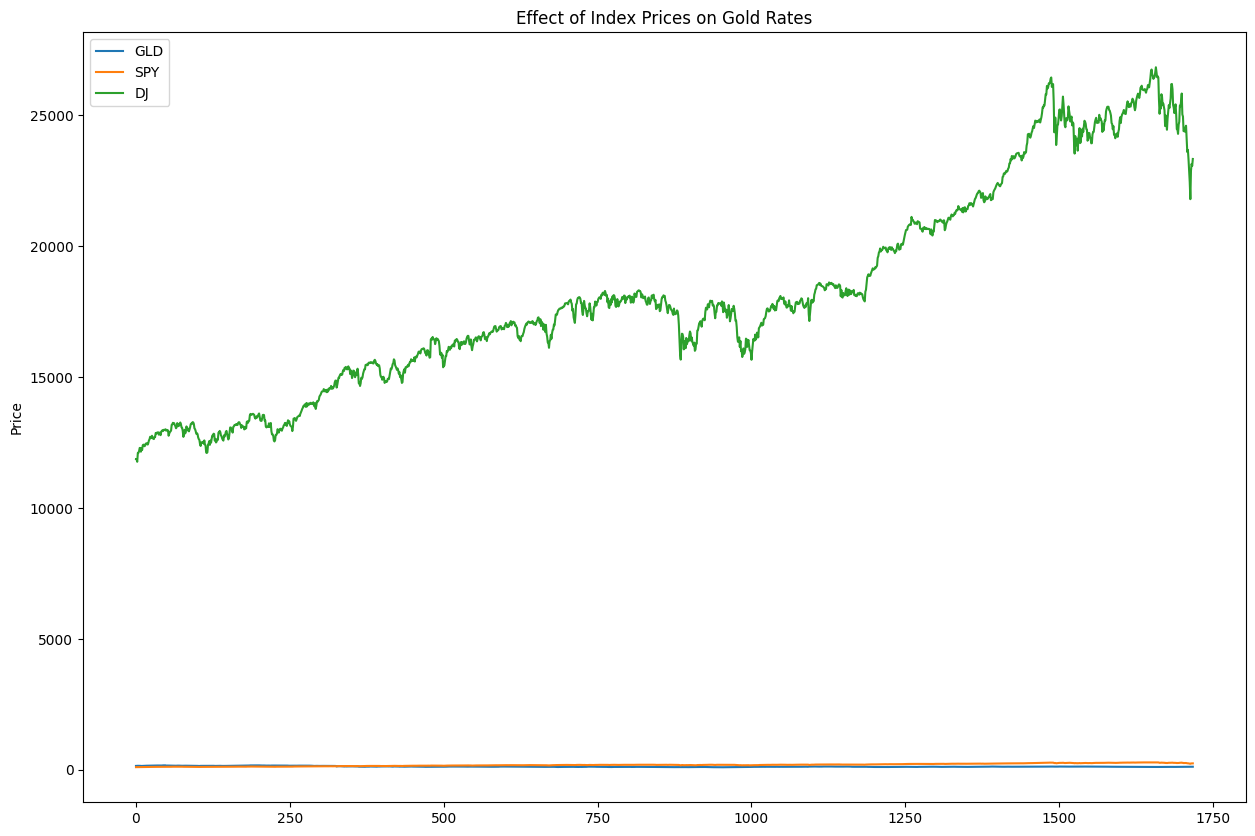

In [7]:
gld_adj_close = data['Adj Close']
spy_adj_close = data['SP_Ajclose']
dj_adj_close = data['DJ_Ajclose']

gold_df_p = pd.DataFrame({'GLD': gld_adj_close, 'SPY': spy_adj_close, 'DJ': dj_adj_close})
gold_df_ax = gold_df_p.plot(title = 'Effect of Index Prices on Gold Rates', figsize = (15,10))
gold_df_ax.set_ylabel('Price')
gold_df_ax.legend(loc = 'upper left')
plt.show()

In [8]:
def calc_daily_returns(df): # calculate and return daily returns values
    daily_returns = (df / df.shift(1)) - 1
    daily_returns[0] = 0
    return daily_returns

In [10]:
gld_adj_close = data['Adj Close']
spy_adj_close = data['SP_Ajclose']
dj_adj_close = data['DJ_Ajclose']
eg_adj_close = data['EG_Ajclose']
uso_adj_close = data['USO_Adj Close']
gdx_adj_close = data['GDX_Adj Close']
eu_price = data['EU_Price']
of_price = data['OF_Price']
os_price = data['OS_Price']
sf_price = data['SF_Price']
usb_price = data['USB_Price']
plt_price = data['PLT_Price']
pld_price = data['PLD_Price']
rho_price = data['RHO_PRICE']
usdi_price = data['USDI_Price']

In [11]:
gld_daily_returns = calc_daily_returns(gld_adj_close)
spy_daily_returns = calc_daily_returns(spy_adj_close)
dj_adj_returns = calc_daily_returns(dj_adj_close)
eg_adj_returns = calc_daily_returns(eg_adj_close)
uso_adj_returns = calc_daily_returns(uso_adj_close)
gdx_adj_returns = calc_daily_returns(gdx_adj_close)
eu_returns = calc_daily_returns(eu_price)
of_returns = calc_daily_returns(of_price)
os_returns = calc_daily_returns(os_price)
sf_returns = calc_daily_returns(sf_price)
usb_returns = calc_daily_returns(usb_price)
plt_returns = calc_daily_returns(plt_price)
pld_returns = calc_daily_returns(pld_price)
rho_returns = calc_daily_returns(rho_price)
usdi_returns = calc_daily_returns(usdi_price)

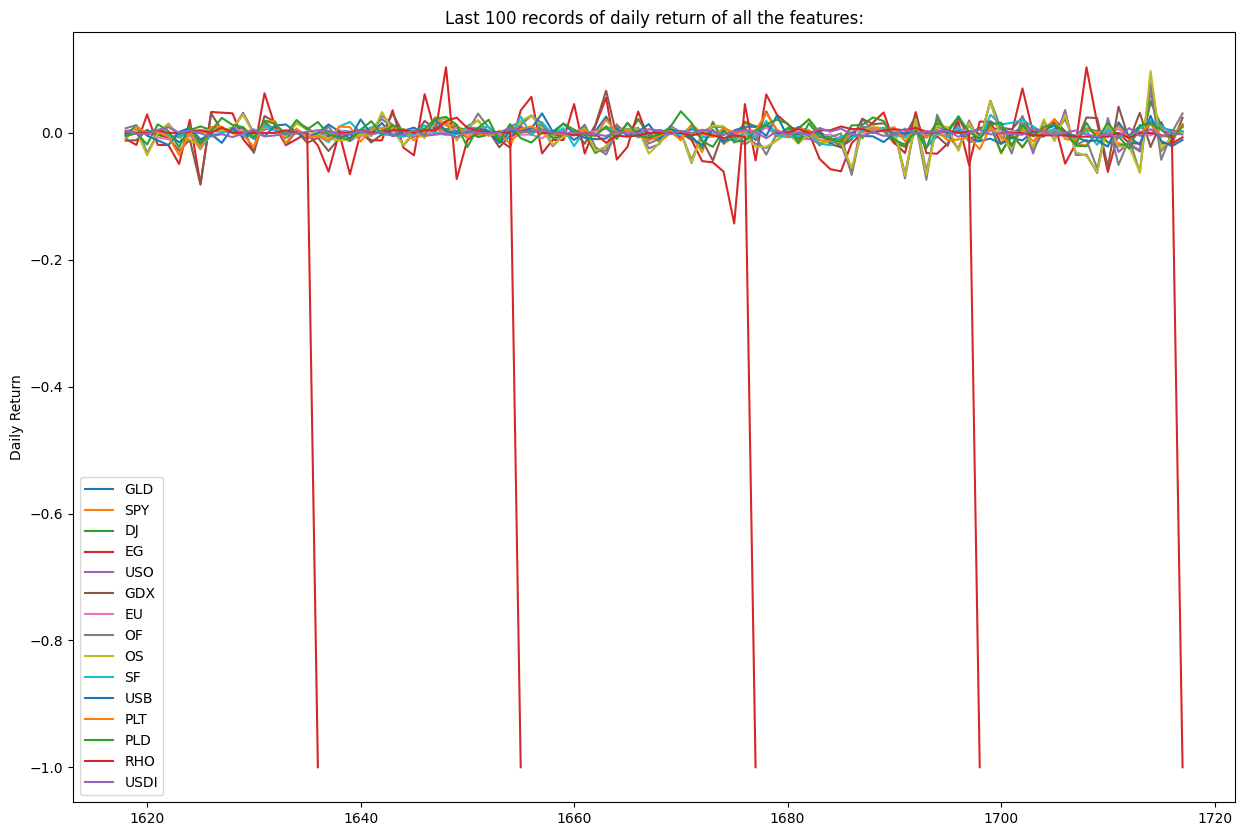

In [12]:
gold_df_d = pd.DataFrame({'GLD': gld_daily_returns, 'SPY': spy_daily_returns, 'DJ': dj_adj_returns, 'EG': eg_adj_returns, 'USO': uso_adj_returns, 'GDX': gdx_adj_returns, 'EU': eu_returns, 'OF': of_returns, 'OS': os_returns, 'SF': sf_returns, 'USB': usb_returns, 'PLT': plt_returns, 'PLD': pld_returns, 'RHO': rho_returns, 'USDI': usdi_returns})
gold_daily_ax = gold_df_d[-100:].plot(title = 'Last 100 records of daily return of all the features:', figsize = (15,10))
gold_daily_ax.set_ylabel('Daily Return')
gold_daily_ax.legend(loc = 'lower left')
plt.show()

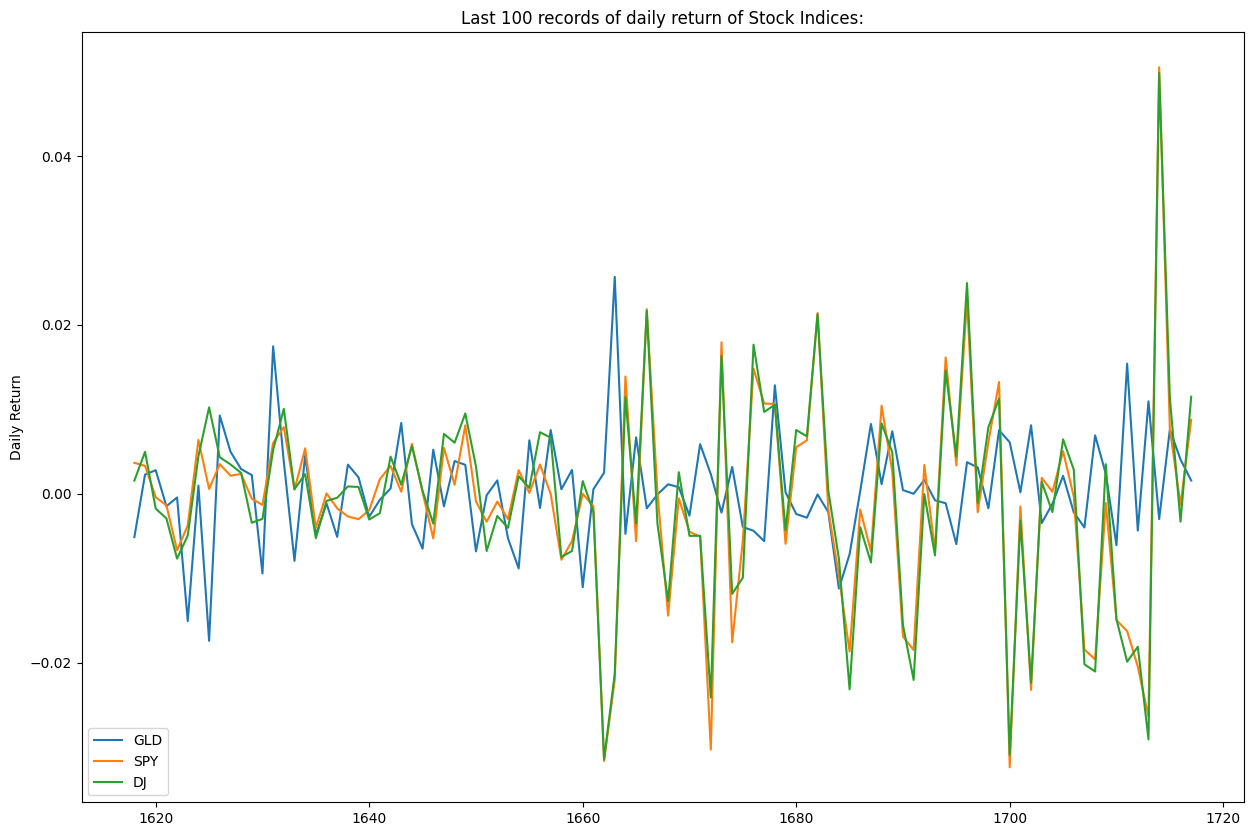

In [13]:
gold_df_s = pd.DataFrame({'GLD': gld_daily_returns, 'SPY': spy_daily_returns, 'DJ': dj_adj_returns})
gold_daily_ax = gold_df_s[-100:].plot(title = 'Last 100 records of daily return of Stock Indices:', figsize = (15,10))
gold_daily_ax.set_ylabel('Daily Return')
gold_daily_ax.legend(loc = 'lower left')

plt.show()

<Axes: xlabel='USDI', ylabel='GLD'>

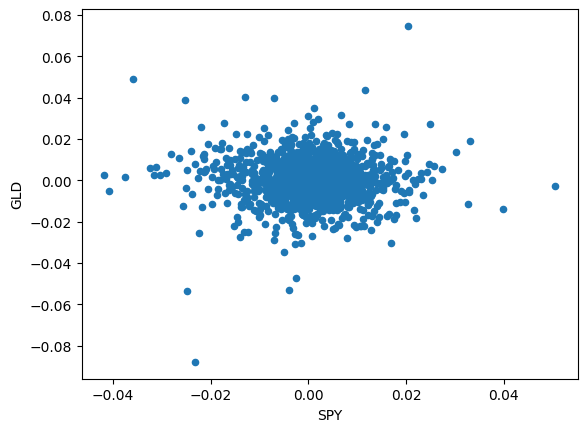

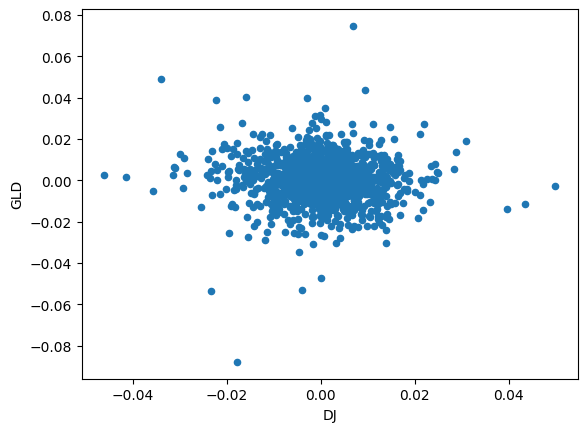

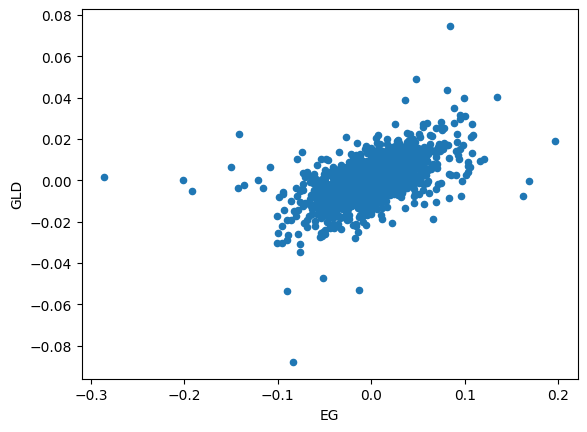

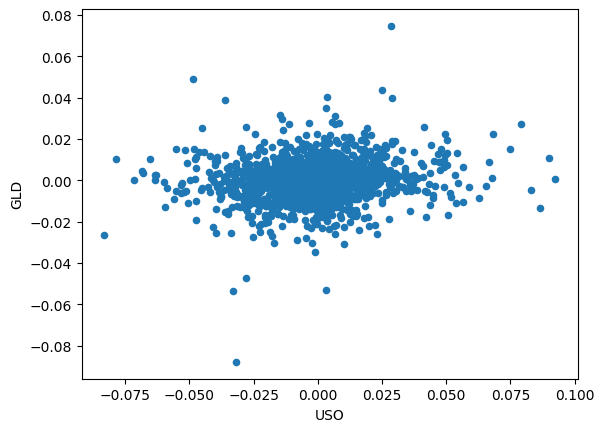

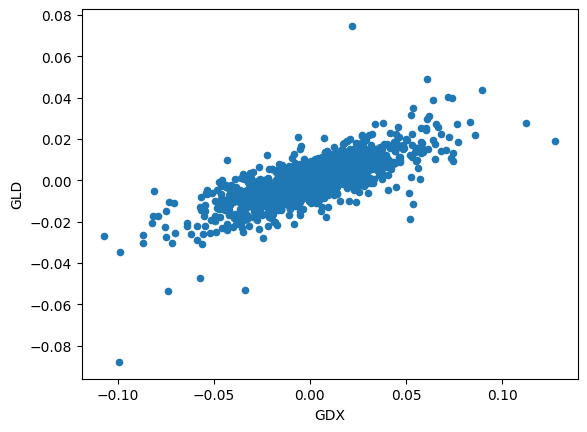

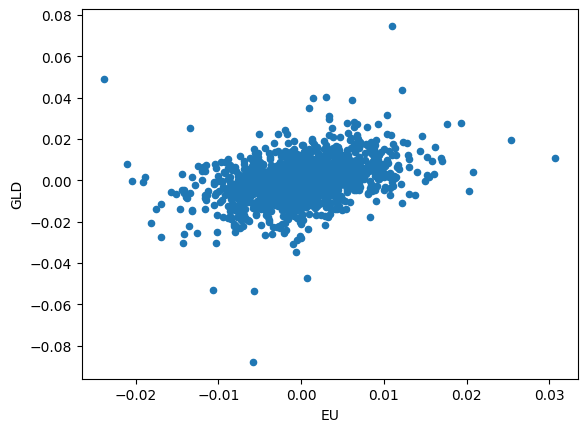

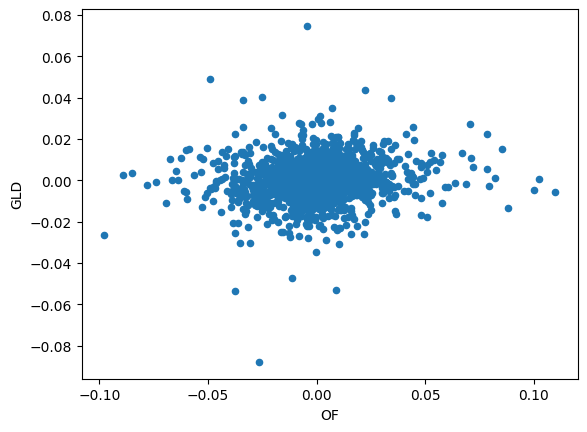

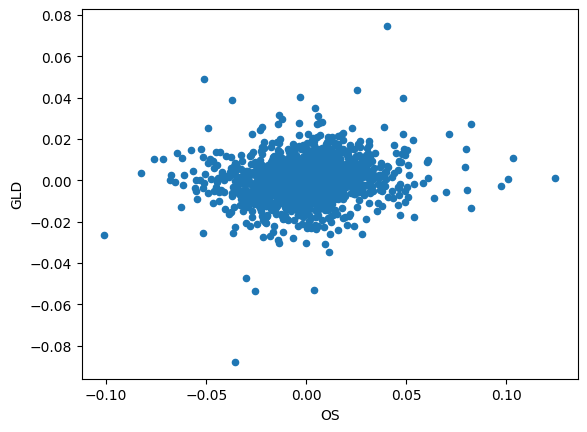

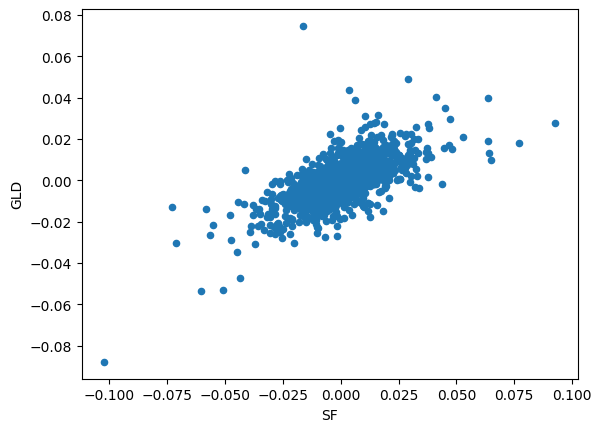

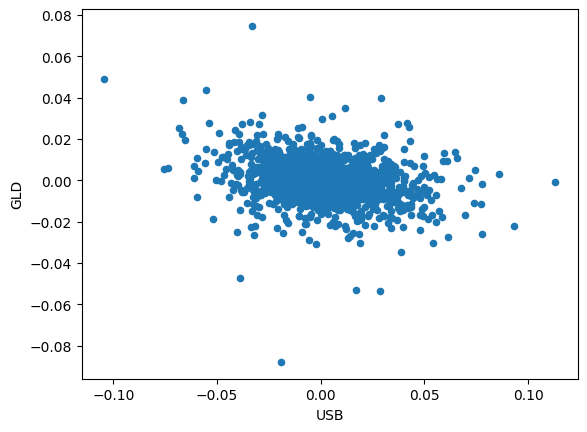

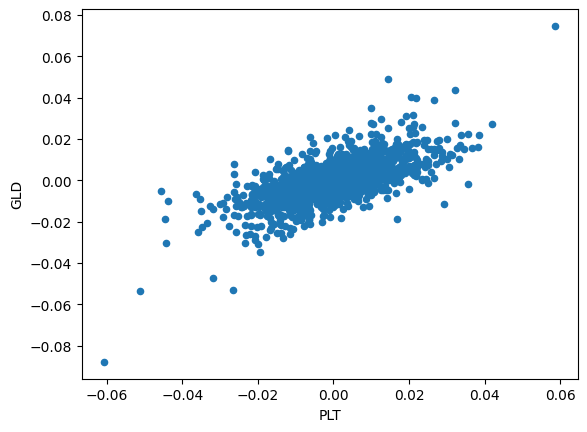

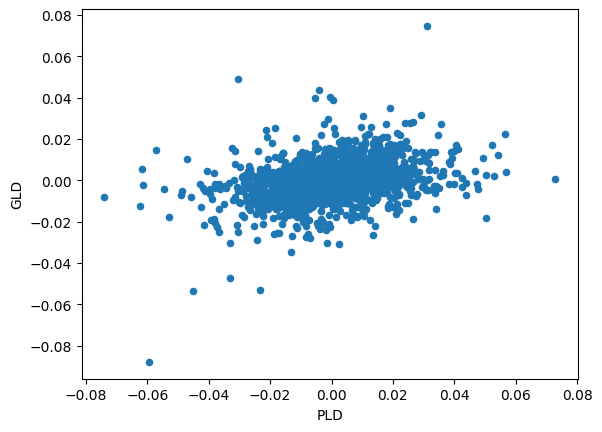

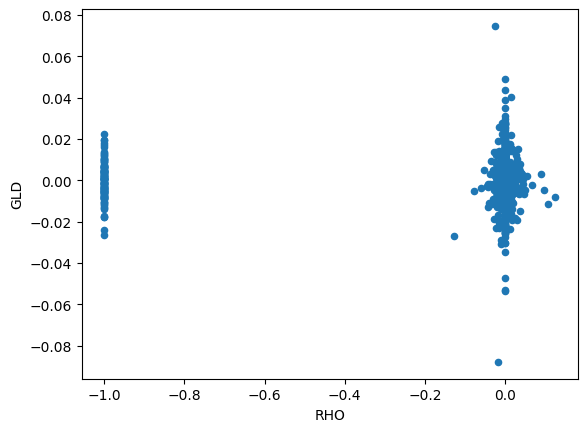

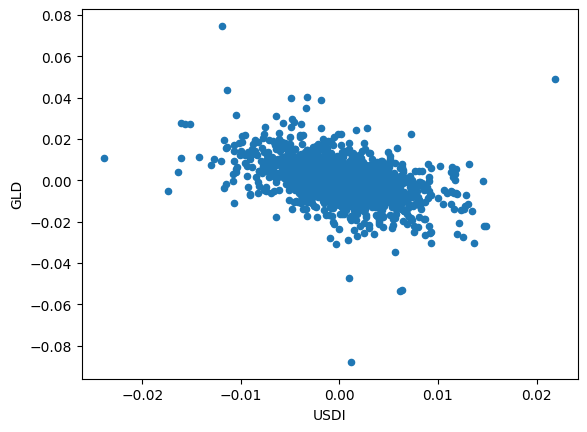

In [14]:
gold_df_d.plot(kind = 'scatter', x = 'SPY', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'DJ', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'EG', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'USO', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'GDX', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'EU', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'OF', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'OS', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'SF', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'USB', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'PLT', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'PLD', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'RHO', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'USDI', y = 'GLD')

In [15]:
gold_mean = gold_df_d['GLD'].mean() #calculating mean gold price
gold_std = gold_df_d['GLD'].std() # calculating standard deviation
gold_kurt = gold_df_d['GLD'].kurtosis() # calculating kurtosis value

print('Mean = ', gold_mean)
print('Standard deviation = ', gold_std)
print('Kurtosis = ', gold_kurt)

Mean =  -8.65698612128203e-05
Standard deviation =  0.009611536167006381
Kurtosis =  8.606584924918355


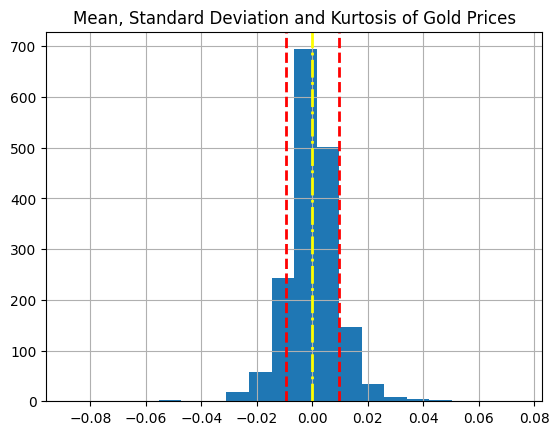

<Figure size 1500x800 with 0 Axes>

In [16]:
gold_df_d['GLD'].hist(bins = 20) # plotting histogram

plt.axvline(gold_mean, color = 'yellow', linestyle = '-.', linewidth = 2)
plt.axvline(gold_std, color = 'red', linestyle = '--', linewidth = 2)
plt.axvline(-gold_std, color = 'red', linestyle = '--', linewidth = 2)
plt.title('Mean, Standard Deviation and Kurtosis of Gold Prices')
plt.figure(figsize = (15,8))

plt.show()

Calculating mean, standard deviation and kurtosis of S&P 500 Index Daily Return

Mean =  0.0005366024364688835
Standard deviation =  0.008262309911393526
Kurtosis =  3.4557859039745233


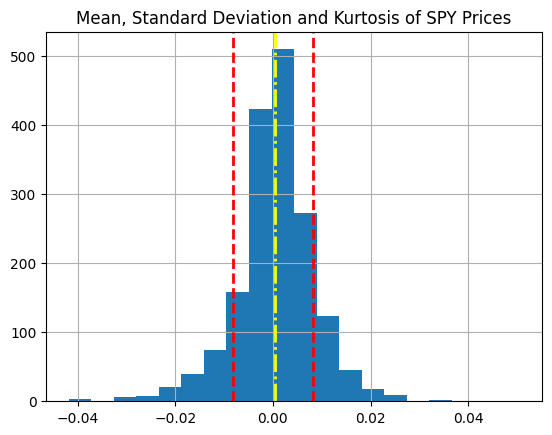

<Figure size 1500x800 with 0 Axes>

In [17]:
gold_sp_mean = gold_df_d['SPY'].mean() # computing mean of gold stock
gold_sp_std = gold_df_d['SPY'].std() # computing standard deviation of gold stock
gold_sp_kurt = gold_df_d['SPY'].kurtosis() # computing kurtosis of gold stock

print('Mean = ', gold_sp_mean)
print('Standard deviation = ', gold_sp_std)
print('Kurtosis = ', gold_sp_kurt)

gold_df_d['SPY'].hist(bins = 20) # plotting histogram

plt.axvline(gold_sp_mean, color = 'yellow', linestyle = '-.', linewidth = 2)
plt.axvline(gold_sp_std, color = 'red', linestyle = '--', linewidth = 2)
plt.axvline(-gold_sp_std, color = 'red', linestyle = '--', linewidth = 2)
plt.title('Mean, Standard Deviation and Kurtosis of SPY Prices')
plt.figure(figsize = (15,8))

plt.show()

In [20]:
import seaborn as sns

<ipython-input-21-96d5fa194668>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

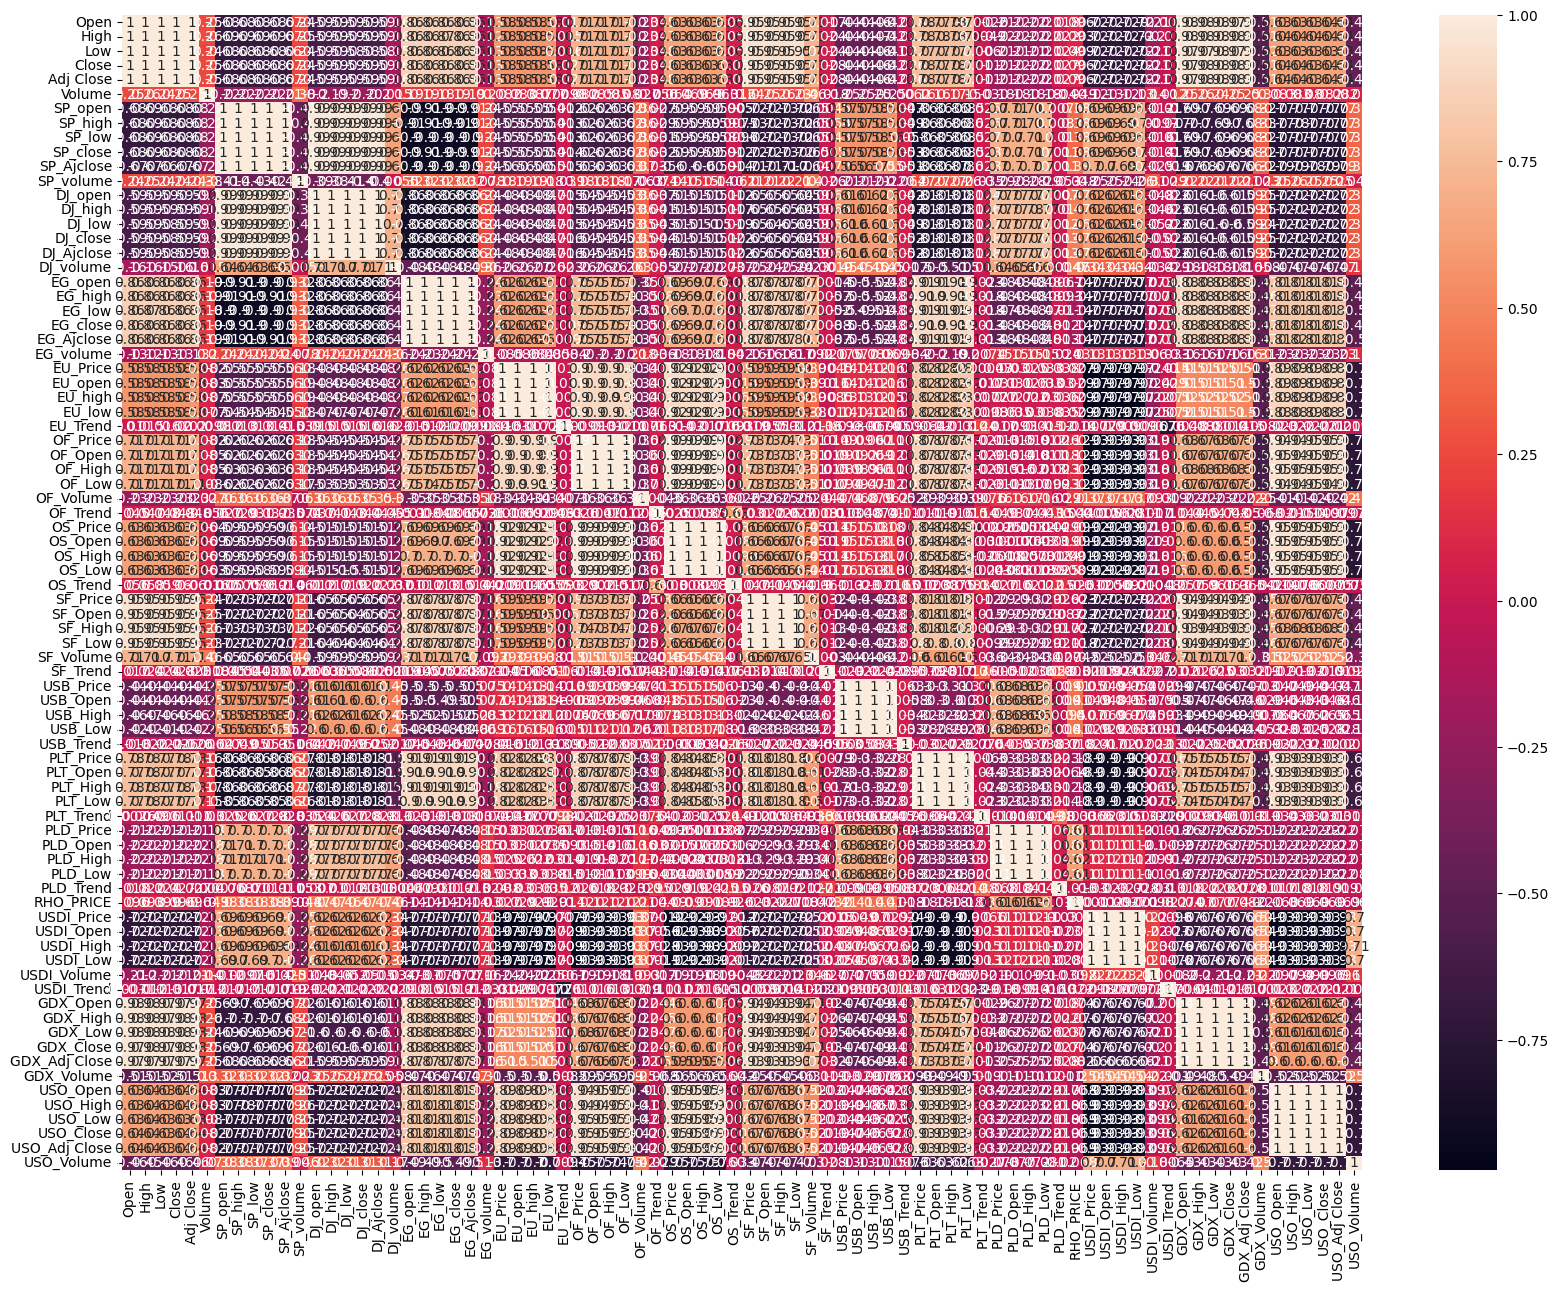

In [21]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), annot = True)

In [22]:
X = data.drop(['Adj Close'], axis = 1)
X = X.drop(['Close'], axis = 1)

<ipython-input-23-295c4ba38f08>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corrwith(data['Adj Close']).plot.bar(title = 'Correlation with Adj Close', rot = 90, grid = True, figsize = (20,15), fontsize = 15)


<Axes: title={'center': 'Correlation with Adj Close'}>

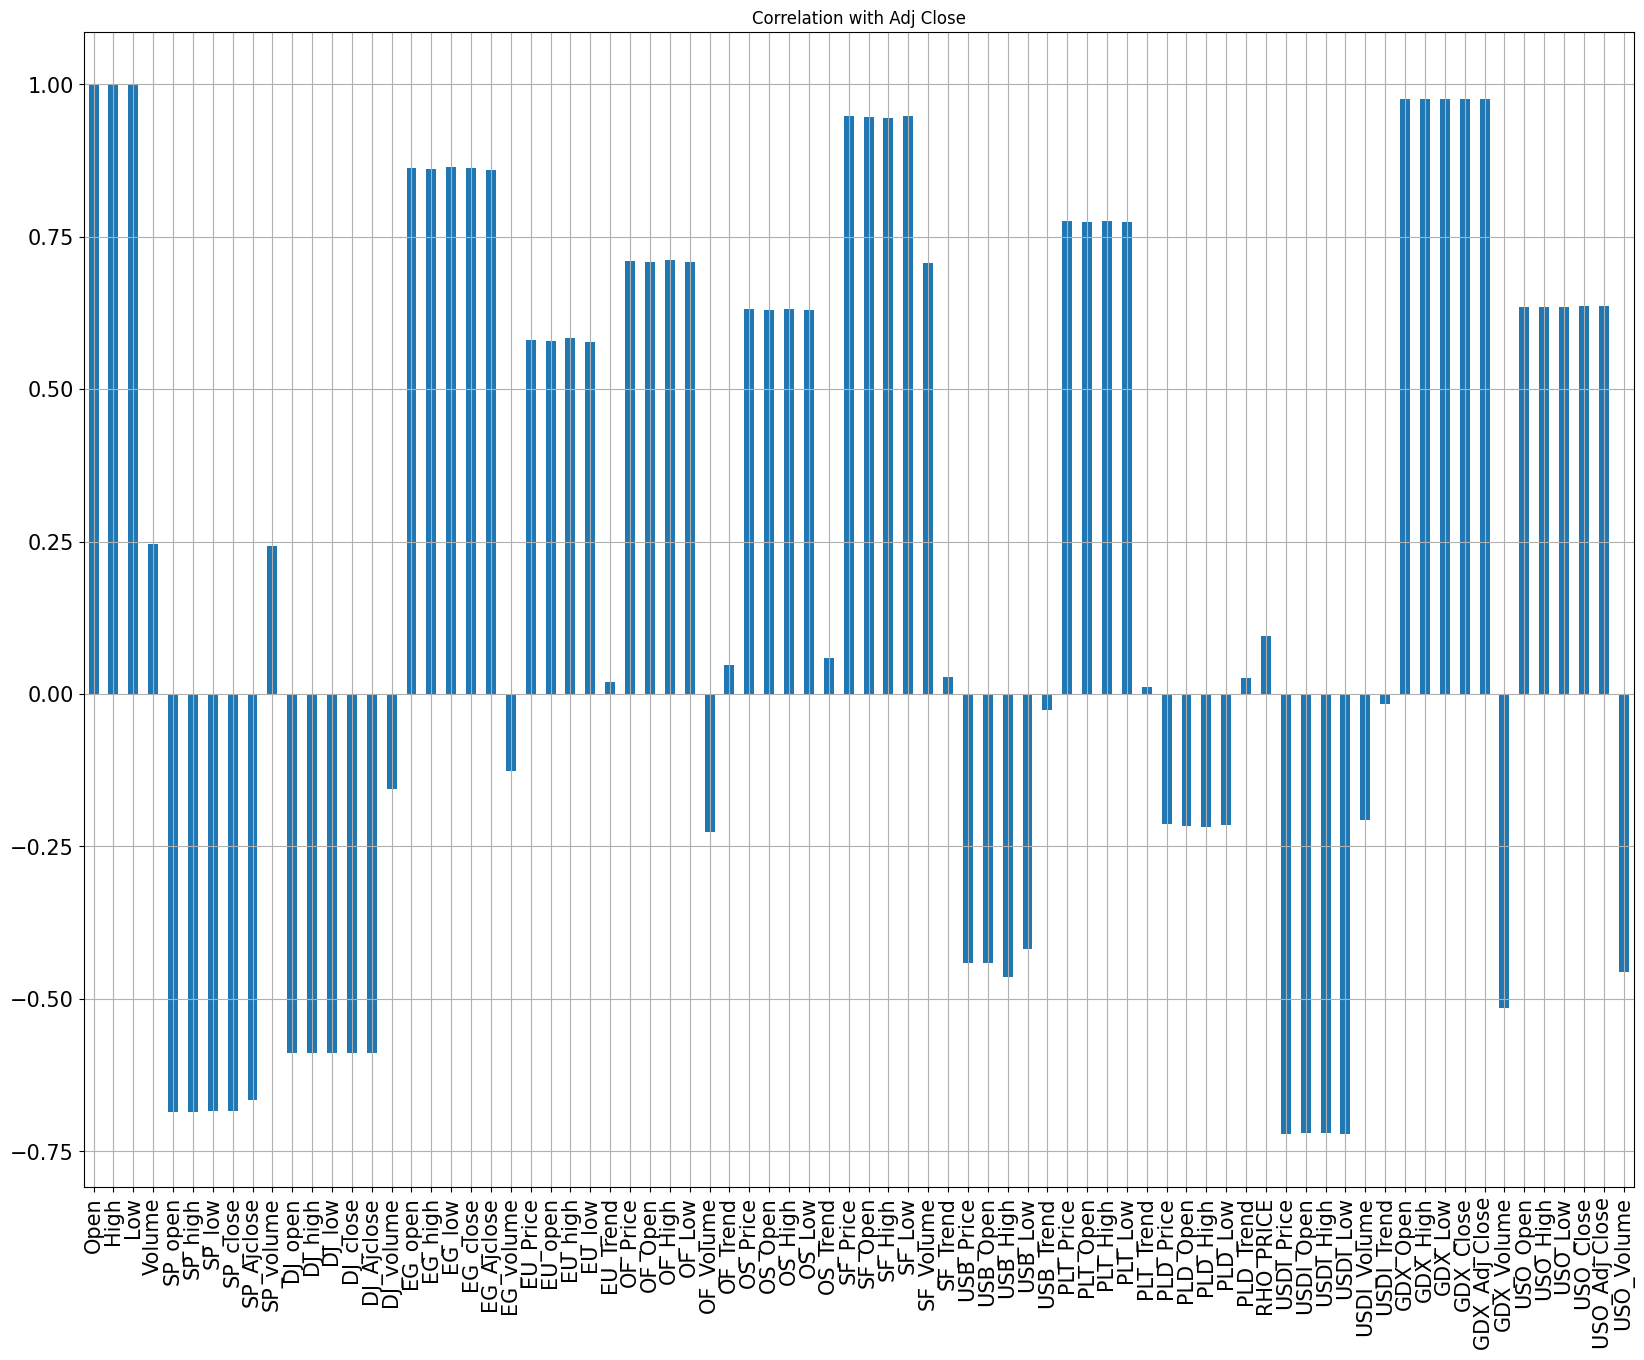

In [23]:
X.corrwith(data['Adj Close']).plot.bar(title = 'Correlation with Adj Close', rot = 90, grid = True, figsize = (20,15), fontsize = 15)

In [24]:
correlation_matrix = data.corr()
coeff = correlation_matrix['Adj Close'].sort_values(ascending = False)

<ipython-input-24-172b04fae505>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [25]:
posi_corr = coeff[coeff > 0]
posi_corr

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Adj Close    0.635675
USO_Close        0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low           0.629083
EU_high          0.582969
EU_Price    

In [26]:
nega_corr = coeff[coeff < 0]
nega_corr

USDI_Trend    -0.016641
USB_Trend     -0.025933
EG_volume     -0.126586
DJ_volume     -0.155526
USDI_Volume   -0.205954
PLD_Price     -0.213179
PLD_Low       -0.214919
PLD_Open      -0.216426
PLD_High      -0.217490
OF_Volume     -0.225436
USB_Low       -0.417352
USB_Open      -0.440822
USB_Price     -0.441347
USO_Volume    -0.456193
USB_High      -0.464116
GDX_Volume    -0.514616
DJ_low        -0.588157
DJ_Ajclose    -0.588411
DJ_close      -0.588411
DJ_high       -0.588778
DJ_open       -0.588800
SP_Ajclose    -0.666071
SP_low        -0.683750
SP_close      -0.684284
SP_open       -0.684618
SP_high       -0.684904
USDI_High     -0.720023
USDI_Open     -0.720140
USDI_Price    -0.721569
USDI_Low      -0.722078
Name: Adj Close, dtype: float64